In [1]:
import pandas as pd

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

Случаи сердечного приступа после вакцинации против Covid в Индии

In [3]:
df = pd.read_csv("~/Загрузки/heart_attack_vaccine_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [6]:
# 1. Проверка дубликатов
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 0


In [7]:
# 2. Проверка пустых значений
print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 Patient ID                   0
Age                          0
Gender                       0
Vaccination Date             0
Vaccine Dose                 0
Pre-existing Conditions     71
Heart Attack Date          397
Severity                   397
Outcome                    397
Location                     0
Blood Pressure               0
Cholesterol Level            0
BMI                          0
Smoking History              0
Diabetes Status              0
dtype: int64


In [10]:
#Мы не можем столько удалить, тк это больше 10% которые рекомендуется удалить(заполним их как -1)
df = df.fillna(-1)

In [ ]:
#Кол-во пустых значений 0
print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 Patient ID                 0
Age                        0
Gender                     0
Vaccination Date           0
Vaccine Dose               0
Pre-existing Conditions    0
Heart Attack Date          0
Severity                   0
Outcome                    0
Location                   0
Blood Pressure             0
Cholesterol Level          0
BMI                        0
Smoking History            0
Diabetes Status            0
dtype: int64


In [12]:
# Вспомогательная переменная для определния был ли ссердечный приступ
df['HeartAttack'] = df['Heart Attack Date'].apply(lambda x: 1 if pd.notnull(x) else 0)

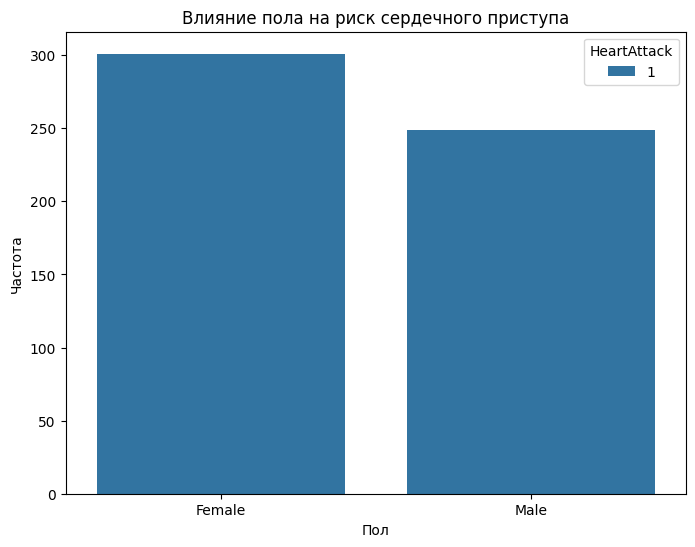

In [ ]:
# проверка на то, влияет ли пол
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='HeartAttack')
plt.title('Влияние пола на риск сердечного приступа')
plt.xlabel('Пол')
plt.ylabel('Частота')
plt.show()

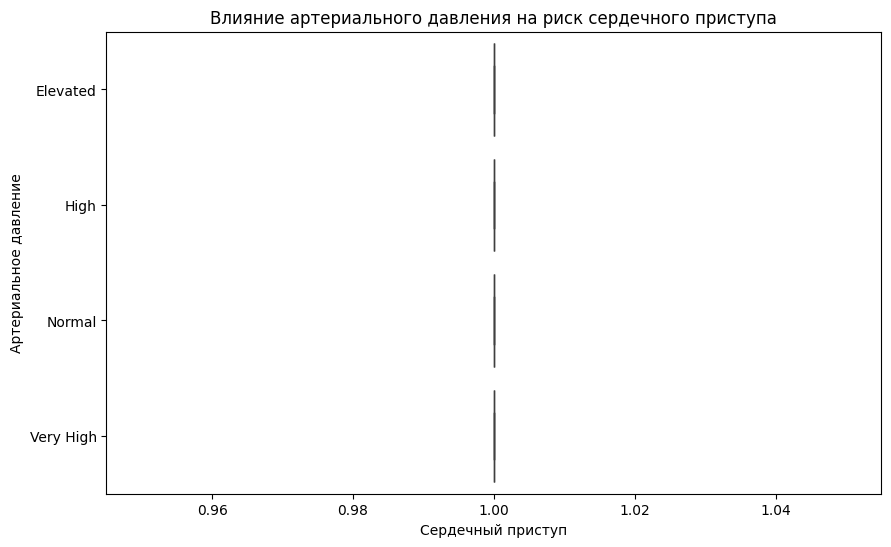

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='HeartAttack', y='Blood Pressure')
plt.title('Влияние артериального давления на риск сердечного приступа')
plt.xlabel('Сердечный приступ')
plt.ylabel('Артериальное давление')
plt.show()

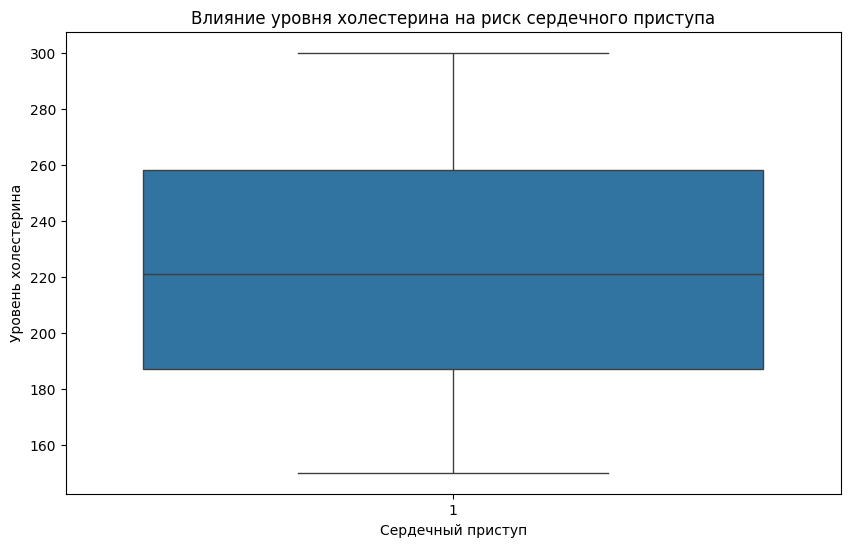

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='HeartAttack', y='Cholesterol Level')
plt.title('Влияние уровня холестерина на риск сердечного приступа')
plt.xlabel('Сердечный приступ')
plt.ylabel('Уровень холестерина')
plt.show()

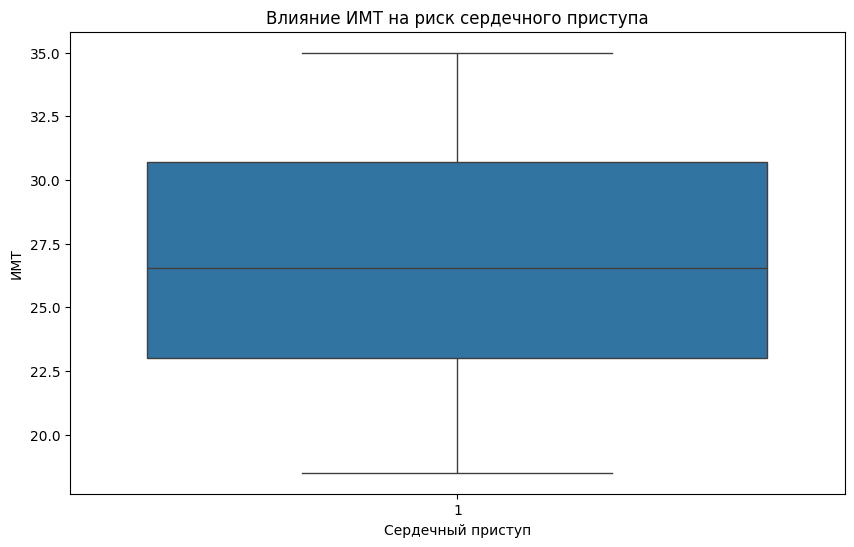

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='HeartAttack', y='BMI')
plt.title('Влияние ИМТ на риск сердечного приступа')
plt.xlabel('Сердечный приступ')
plt.ylabel('ИМТ')
plt.show()

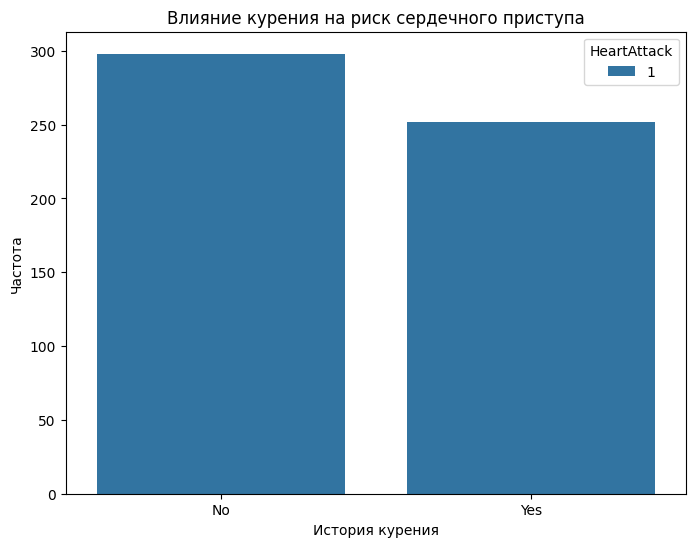

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Smoking History', hue='HeartAttack')
plt.title('Влияние курения на риск сердечного приступа')
plt.xlabel('История курения')
plt.ylabel('Частота')
plt.show()

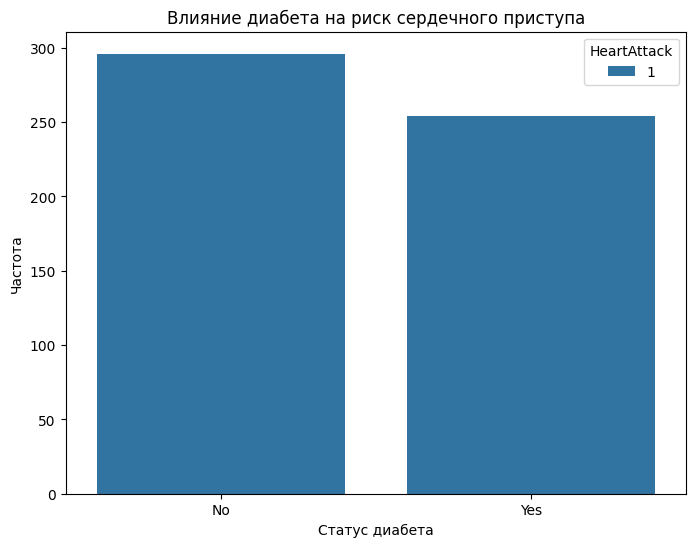

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Diabetes Status', hue='HeartAttack')
plt.title('Влияние диабета на риск сердечного приступа')
plt.xlabel('Статус диабета')
plt.ylabel('Частота')
plt.show()

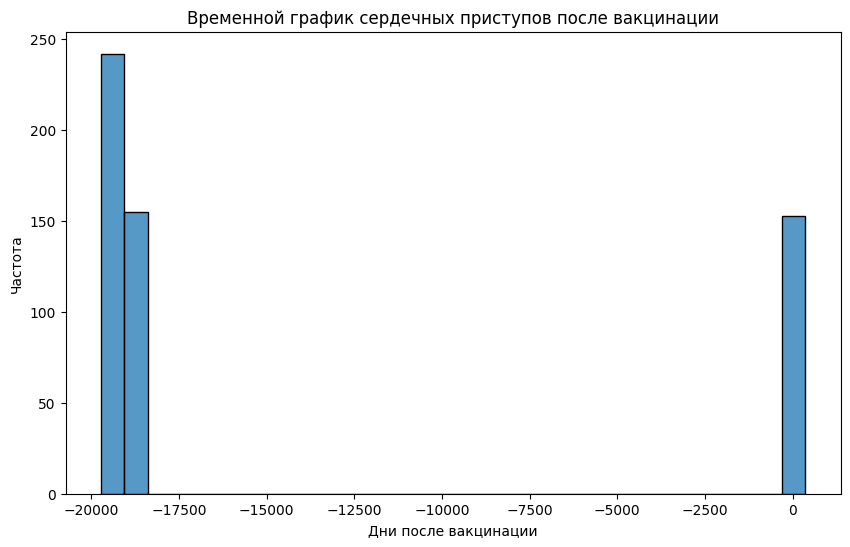

In [24]:
df['Vaccination Date'] = pd.to_datetime(df['Vaccination Date'])
df['Heart Attack Date'] = pd.to_datetime(df['Heart Attack Date'])

df['Days After Vaccination'] = (df['Heart Attack Date'] - df['Vaccination Date']).dt.days
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['HeartAttack']==1], x='Days After Vaccination', bins=30)
plt.title('Временной график сердечных приступов после вакцинации')
plt.xlabel('Дни после вакцинации')
plt.ylabel('Частота')
plt.show()

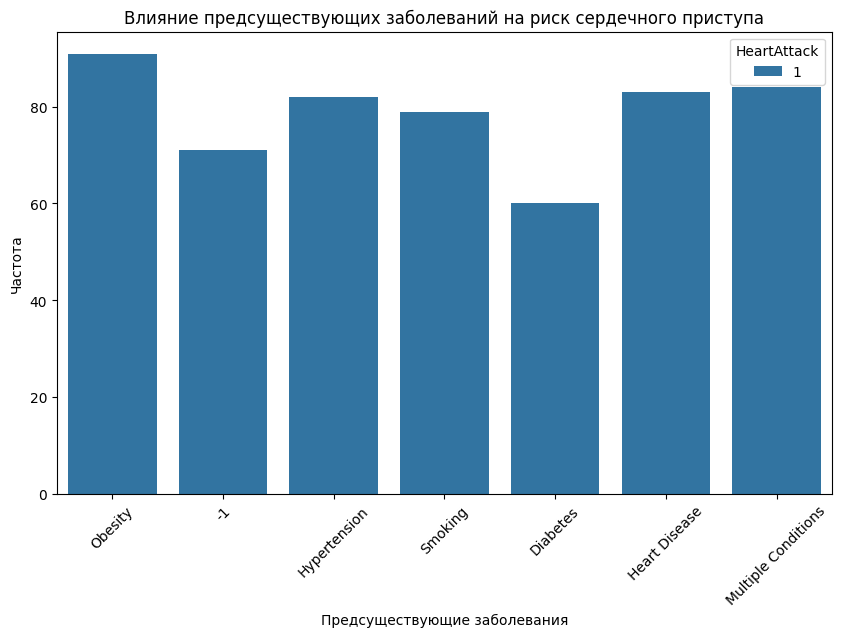

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Pre-existing Conditions', hue='HeartAttack')
plt.title('Влияние предсуществующих заболеваний на риск сердечного приступа')
plt.xlabel('Предсуществующие заболевания')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

На основе анализа и графиков можно выделить основные факторы риска сердечного приступа:
Чем старше пациент, тем выше вероятность сердечного приступа. Высокое давление увеличивает риск. Высокий уровень холестерина также является важным фактором.
Избыточный вес или ожирение значительно повышает риск в сравнение с другими параметрами. 
Курение практически не влияет на риск.
Диабет практически не влияет на риск. Сердечно-сосудистые заболевания и гипертония увеличивают вероятность.